In [37]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
cafe = pd.read_csv("dirty_cafe_sales.csv")
cafe.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [3]:
cafe.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transaction ID    10000 non-null  str  
 1   Item              9667 non-null   str  
 2   Quantity          9862 non-null   str  
 3   Price Per Unit    9821 non-null   str  
 4   Total Spent       9827 non-null   str  
 5   Payment Method    7421 non-null   str  
 6   Location          6735 non-null   str  
 7   Transaction Date  9841 non-null   str  
dtypes: str(8)
memory usage: 625.1 KB


In [4]:
cafe.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [5]:
cafe.rename(columns={
    'Transaction ID': 'Transaction_id',
    'Item': 'Item',
    'Quantity': 'Quantity',
    'Price Per Unit': 'Unit_price',
    'Total Spent': 'Total_spent',
    'Payment Method': 'Payment_method',
    'Location': 'Location',
    'Transaction Date': 'Transaction_date'
}, inplace=True)
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [6]:
num_cols=['Quantity', 'Unit_price', 'Total_spent']
cafe[num_cols] = cafe[num_cols].apply(pd.to_numeric, errors='coerce')
cafe[num_cols].dtypes

Quantity       float64
Unit_price     float64
Total_spent    float64
dtype: object

In [7]:
cafe[num_cols] = cafe[num_cols].replace({
    'ERROR': np.nan,
    " ": np.nan
})
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [8]:
catg_cols=['Item', 'Payment_method', 'Location']
cafe[catg_cols] = cafe[catg_cols].replace({
    'ERROR': 'Unknown',
    " ": 'Unknown',
    np.nan: 'Unknown',
    'UNKNOWN': 'Unknown'
})
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Unknown,2023-03-31
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28
8,TXN_4717867,Unknown,5.0,3.0,15.0,Unknown,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Unknown,In-store,2023-12-31


In [9]:
cafe[catg_cols] = cafe[catg_cols].apply(lambda col: col.str.lower())
cafe.head(10)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-06-11
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-10-06
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31


In [10]:
valid_rows = cafe[['Quantity','Unit_price','Total_spent']].notna().all(axis=1)

np.isclose(
    cafe.loc[valid_rows, 'Quantity'] * cafe.loc[valid_rows, 'Unit_price'],
    cafe.loc[valid_rows, 'Total_spent']
).all()



np.True_

In [11]:
cafe.head(50)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-06-11
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-10-06
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31


In [12]:
cafe['Transaction_date'] = cafe['Transaction_date'].replace('ERROR', np.nan)
cafe['Transaction_date'].head(15)

0     2023-09-08
1     2023-05-16
2     2023-07-19
3     2023-04-27
4     2023-06-11
5     2023-03-31
6     2023-10-06
7     2023-10-28
8     2023-07-28
9     2023-12-31
10    2023-11-07
11           NaN
12    2023-05-03
13    2023-06-01
14    2023-03-21
Name: Transaction_date, dtype: str

In [13]:
from dateutil import parser
def date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT
cafe['Transaction_date'] = cafe['Transaction_date'].apply(date_parser)
cafe['Transaction_date'].head(15)

0    2023-08-09
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-11-06
5    2023-03-31
6    2023-06-10
7    2023-10-28
8    2023-07-28
9    2023-12-31
10   2023-07-11
11          NaT
12   2023-03-05
13   2023-01-06
14   2023-03-21
Name: Transaction_date, dtype: datetime64[us]

In [14]:
#Most Purchased Item
cafe['Item'].mode()[0]

'juice'

In [15]:
Total_revenue = cafe['Total_spent'].sum()
print("Total Revenue:", Total_revenue)

Total Revenue: 84763.5


In [16]:
#Revenue by Item Category
Revenue_by_item = cafe.groupby('Item')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False)
Revenue_by_item

,Item,Total_spent
4,salad,16605.0
5,sandwich,12956.0
6,smoothie,12556.0
3,juice,9984.0
0,cake,9933.0
8,unknown,8140.0
1,coffee,6784.0
7,tea,4735.5
2,cookie,3070.0


In [17]:
Revenue_by_location =cafe.groupby('Location')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False) 
Revenue_by_location

,Location,Total_spent
2,unknown,33628.0
0,in-store,25906.0
1,takeaway,25229.5


In [18]:
cafe.head(50)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-08-09
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-11-06
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-06-10
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31


In [19]:
#Most common payment method
cafe['Payment_method'].mode()[0]

'unknown'

In [20]:
Average_spend = cafe['Total_spent'].mean().round(2)
print('Average_spend:', Average_spend)

Average_spend: 8.92


In [32]:
cafe['Month'] = cafe['Transaction_date'].dt.month_name().str.lower()
cafe['Day'] = cafe['Transaction_date'].dt.day_name().str.lower()
cafe.head(15)

,Transaction_id,Item,Quantity,Unit_price,Total_spent,Payment_method,Location,Transaction_date,Month,Day
0,TXN_1961373,coffee,2.0,2.0,4.0,credit card,takeaway,2023-08-09,august,wednesday
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in-store,2023-05-16,may,tuesday
2,TXN_4271903,cookie,4.0,1.0,NaN,credit card,in-store,2023-07-19,july,wednesday
3,TXN_7034554,salad,2.0,5.0,10.0,unknown,unknown,2023-04-27,april,thursday
4,TXN_3160411,coffee,2.0,2.0,4.0,digital wallet,in-store,2023-11-06,november,monday
5,TXN_2602893,smoothie,5.0,4.0,20.0,credit card,unknown,2023-03-31,march,friday
6,TXN_4433211,unknown,3.0,3.0,9.0,unknown,takeaway,2023-06-10,june,saturday
7,TXN_6699534,sandwich,4.0,4.0,16.0,cash,unknown,2023-10-28,october,saturday
8,TXN_4717867,unknown,5.0,3.0,15.0,unknown,takeaway,2023-07-28,july,friday
9,TXN_2064365,sandwich,5.0,4.0,20.0,unknown,in-store,2023-12-31,december,sunday


In [55]:
#monthly sales trend
cafe['month_number'] = cafe['Transaction_date'].dt.month
monthly_sales = cafe.groupby(['month_number','Month'])['Total_spent'].sum().reset_index().sort_values('month_number')
monthly_sales

,month_number,Month,Total_spent
0,1.0,january,6588.5
1,2.0,february,6238.0
2,3.0,march,6814.5
3,4.0,april,6766.5
4,5.0,may,6607.0
5,6.0,june,7797.5
6,7.0,july,6837.5
7,8.0,august,6861.0
8,9.0,september,6282.0
9,10.0,october,7188.5


In [28]:
busiest_month = monthly_sales.idxmax()
print('Busiest_month:', busiest_month)

Busiest_month: june


In [29]:
slowest_month = monthly_sales.idxmin()
print('slowest_month:', slowest_month)

slowest_month: february


In [33]:
Daily_sales_performance = cafe.groupby('Day')['Total_spent'].sum().sort_values()
Daily_sales_performance

Day
wednesday    11066.5
tuesday      11170.5
thursday     11270.5
saturday     11548.0
sunday       11810.0
friday       11867.0
monday       12068.0
Name: Total_spent, dtype: float64

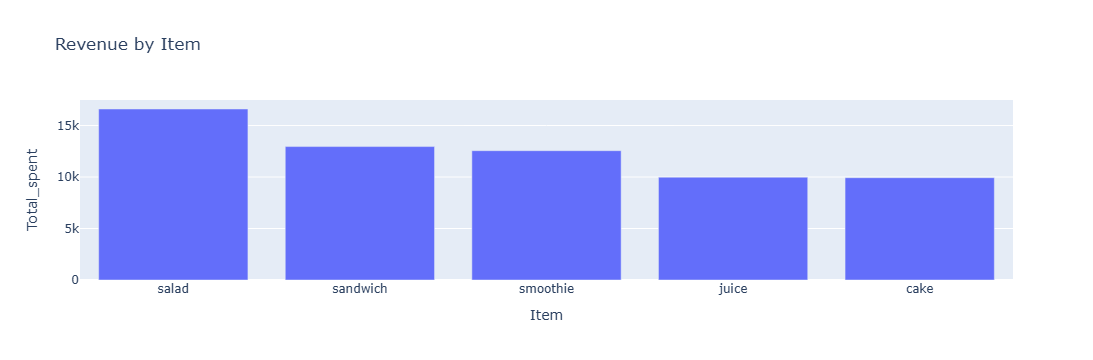

In [46]:
Revenue_by_item = cafe.groupby('Item')['Total_spent'].sum().reset_index().sort_values(by='Total_spent', ascending=False).head(5)
fig = px.bar(
    Revenue_by_item,
    x = 'Item',
    y = 'Total_spent',
    title = 'Revenue by Item',
    
)
fig.show()

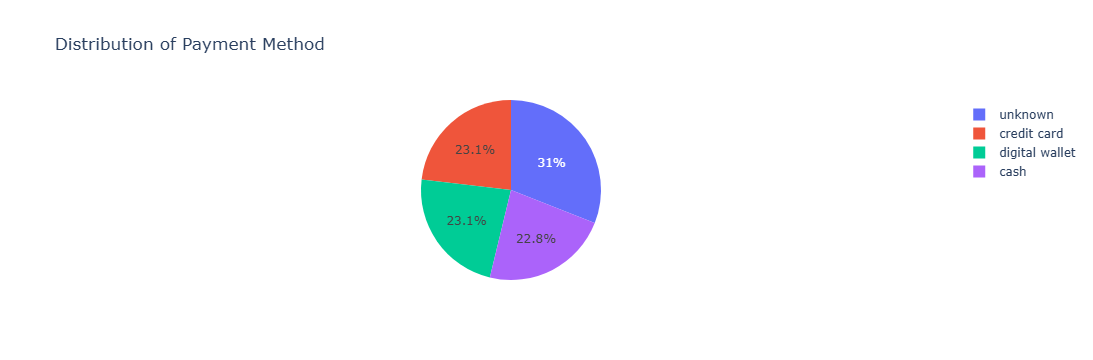

In [48]:
Revenue_by_payment_method = cafe.groupby('Payment_method')['Total_spent'].sum().reset_index()
fig = px.pie(
    Revenue_by_payment_method,
    names='Payment_method',
    values='Total_spent',
    title='Distribution of Payment Method'
)
fig.show()

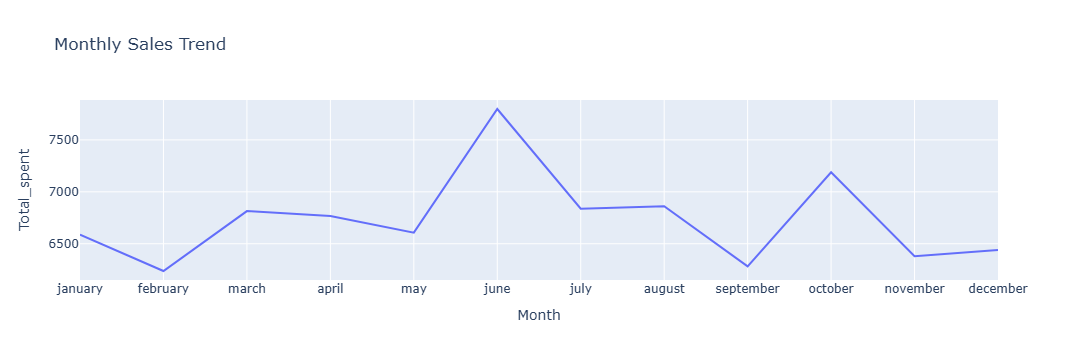

In [56]:
fig = px.line(
    monthly_sales,
    x = 'Month',
    y = 'Total_spent',
    title = 'Monthly Sales Trend'
)
fig.show()

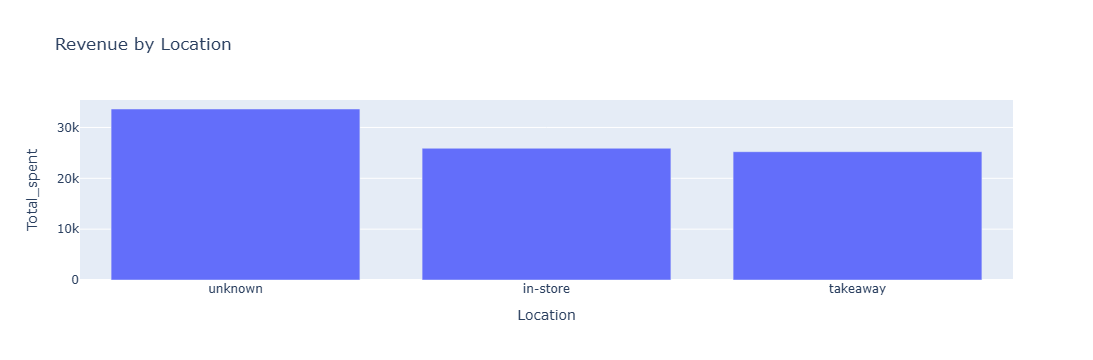

In [57]:
fig = px.bar(
    Revenue_by_location,
    x = 'Location',
    y = 'Total_spent',
    title = 'Revenue by Location'
)
fig.show()

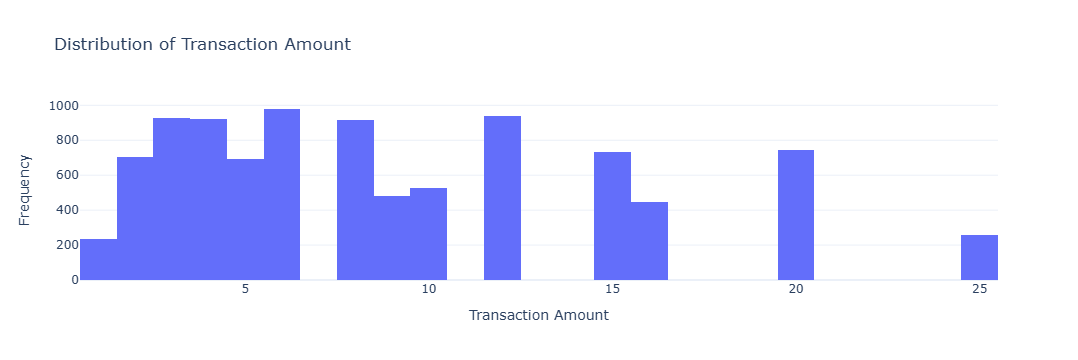

In [59]:
fig = px.histogram(
    cafe,
    x='Total_spent',
    nbins=30,
    title='Distribution of Transaction Amount'
)

fig.update_layout(
    xaxis_title='Transaction Amount',
    yaxis_title='Frequency',
    template='plotly_white'
)

fig.show()

In [ ]:
#Insights
Top-performing item by sales is Salad, which generated a sales revenue of 16,605.
Sales performance spiked in june and october while recording a lower sales performance in February and September
Most on-demand product is juice but is not our top performing product. 
This is as a result of price differential. Juice sells at 3 while salad sells at 5.

There were some missing and wrong entries in the dataset which were handled correctly by replacing them with unknowns for proper analysis.

Recommendations for improving data quality and cafe operations
> Increase stock for high-demand products and reduce stock for low-demand products
> Better pricing strategies for products with high-demand
> Increase staff workers during the busiest month(June) and reduce staff workers during slower month for staff optimization
> Bundle top selling products with discounts to boost average spend per transaction
    